Import Libraries

In [111]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

Data

In [112]:
x_train = np.array([[2.5], [3.8], [5.1], [6.3], [7.0], [3.5],
                        [8.5], [5.7], [7.8], [1.9], [6.5],
                        [9.8], [4.9], [8.1], [2.2]], dtype=np.float32)

y_train = np.array([[1.4], [2.2], [2.9], [3.4], [3.7], [2.0],
                        [4.1], [3.1], [3.9], [1.1], [3.5],
                        [4.6], [2.8], [4.2], [1.3]], dtype=np.float32)

In [113]:
# Convert numpy arrays to tensors
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

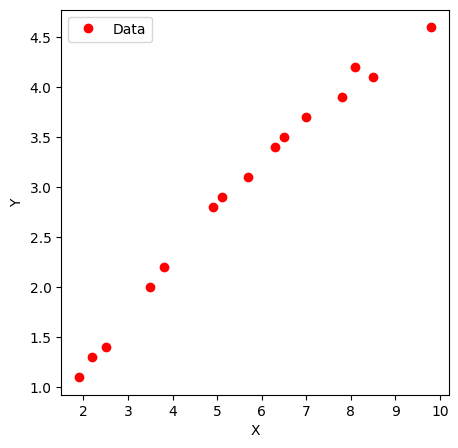

In [114]:
# Visualize data
plt.figure(figsize = (5,5))
plt.plot(x_train,y_train, 'ro', label = "Data")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

Define Linear Model

In [115]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_model = nn.Linear(in_features = 1, out_features = 1)

  def forward(self, x):
    output_prediction = self.linear_model(x)
    return output_prediction

In [116]:
model = LinearRegression()
model

LinearRegression(
  (linear_model): Linear(in_features=1, out_features=1, bias=True)
)

In [117]:
model.state_dict()

OrderedDict([('linear_model.weight', tensor([[0.0696]])),
             ('linear_model.bias', tensor([-0.4611]))])

Loss Function and Optimizer

In [118]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-4)

Training Loop

In [119]:
epochs = 1000
for epoch in range(epochs):
  model.train()
  output_prediction = model(x_train)
  loss = criterion(output_prediction, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if(epoch + 1) % 50 == 0:
    print(f'Epoch - {epoch + 1} / {epochs} \t Loss - {loss.item():.6f}')

Epoch - 50 / 1000 	 Loss - 4.828137
Epoch - 100 / 1000 	 Loss - 2.335187
Epoch - 150 / 1000 	 Loss - 1.160538
Epoch - 200 / 1000 	 Loss - 0.606977
Epoch - 250 / 1000 	 Loss - 0.346031
Epoch - 300 / 1000 	 Loss - 0.222945
Epoch - 350 / 1000 	 Loss - 0.164807
Epoch - 400 / 1000 	 Loss - 0.137271
Epoch - 450 / 1000 	 Loss - 0.124151
Epoch - 500 / 1000 	 Loss - 0.117824
Epoch - 550 / 1000 	 Loss - 0.114698
Epoch - 600 / 1000 	 Loss - 0.113080
Epoch - 650 / 1000 	 Loss - 0.112173
Epoch - 700 / 1000 	 Loss - 0.111601
Epoch - 750 / 1000 	 Loss - 0.111188
Epoch - 800 / 1000 	 Loss - 0.110851
Epoch - 850 / 1000 	 Loss - 0.110549
Epoch - 900 / 1000 	 Loss - 0.110264
Epoch - 950 / 1000 	 Loss - 0.109988
Epoch - 1000 / 1000 	 Loss - 0.109716


Test

In [120]:
model.eval()
with torch.no_grad():
  predictions = model(x_train)
predictions.data.numpy()

array([[1.0709591],
       [1.8153017],
       [2.5596445],
       [3.24673  ],
       [3.6475298],
       [1.6435304],
       [4.5063868],
       [2.903187 ],
       [4.105587 ],
       [0.7274163],
       [3.3612442],
       [5.2507296],
       [2.44513  ],
       [4.2773585],
       [0.8991877]], dtype=float32)

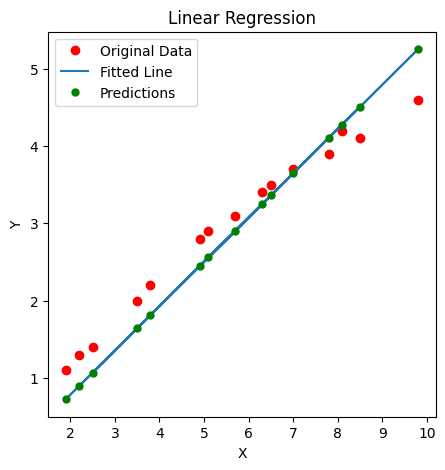

In [132]:
# Visualize Results
plt.figure(figsize = (5,5))
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label = "Original Data")

plt.plot(x_train.numpy(), predictions, label = 'Fitted Line')

plt.plot(x_train.numpy(), predictions.numpy(), 'go', markersize = 5, label = 'Predictions')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()

Single Data point

In [133]:
test_data = 7.2
test_data_tensor = torch.tensor(
    [[test_data]],
    dtype = torch.float32
)

model.eval()

with torch.no_grad():
  y_pred = model(test_data_tensor)

print(f"Prediction - {y_pred.item():.4f}")

Prediction - 3.7620


Text(0.5, 1.0, 'Custom Prediction')

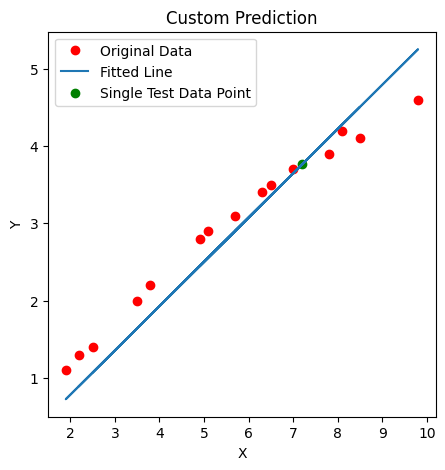

In [134]:
fig = plt.figure(figsize = (5, 5))
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label = "Original Data")

plt.plot(x_train.numpy(), predictions, label = 'Fitted Line')

plt.scatter([test_data_tensor], [y_pred.item()], color = 'green', label = 'Single Test Data Point')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Custom Prediction')